Download der Daten: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GEE&QO_fu146_anzr=Nv4%20Pn44vr45

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('../data/flight_data.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440751 entries, 0 to 440750
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DEPARTURES_SCHEDULED  440751 non-null  float64
 1   DEPARTURES_PERFORMED  440751 non-null  float64
 2   PAYLOAD               440751 non-null  float64
 3   SEATS                 440751 non-null  float64
 4   PASSENGERS            440751 non-null  float64
 5   FREIGHT               440751 non-null  float64
 6   MAIL                  440751 non-null  float64
 7   DISTANCE              440751 non-null  float64
 8   RAMP_TO_RAMP          440751 non-null  float64
 9   AIR_TIME              440751 non-null  float64
 10  UNIQUE_CARRIER        440751 non-null  object 
 11  UNIQUE_CARRIER_NAME   440751 non-null  object 
 12  CARRIER_GROUP         440751 non-null  int64  
 13  ORIGIN_AIRPORT_ID     440751 non-null  int64  
 14  ORIGIN                440751 non-null  object 
 15  

In [17]:
data.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,13930,ORD,"Chicago, IL",13232,MDW,"Chicago, IL",622,1,2024,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",15855,WST,"Westerly, RI",79,1,2024,12


In [18]:
data.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,10299,ANC,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,8
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,10299,ANC,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,7
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,11555,ENA,"Kenai, AK",10299,ANC,"Anchorage, AK",416,1,2024,7
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,15215,TIQ,"Tinian, TT",14955,SPN,"Saipan, TT",79,1,2024,7
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,14955,SPN,"Saipan, TT",15215,TIQ,"Tinian, TT",79,1,2024,7


In [19]:
data.isna().sum()

DEPARTURES_SCHEDULED    0
DEPARTURES_PERFORMED    0
PAYLOAD                 0
SEATS                   0
PASSENGERS              0
FREIGHT                 0
MAIL                    0
DISTANCE                0
RAMP_TO_RAMP            0
AIR_TIME                0
UNIQUE_CARRIER          0
UNIQUE_CARRIER_NAME     0
CARRIER_GROUP           0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DEST                    0
DEST_CITY_NAME          0
AIRCRAFT_TYPE           0
AIRCRAFT_CONFIG         0
YEAR                    0
MONTH                   0
dtype: int64

In [20]:
data.columns = [x.lower() for x in data.columns.to_list()]
data.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'unique_carrier_name', 'carrier_group',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'aircraft_type', 'aircraft_config', 'year',
       'month'],
      dtype='object')

In [21]:
data["avg_passengers_per_flight"] = (
    (data["passengers"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

In [22]:
data["avg_seats_per_flight"] = (
    (data["seats"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

In [23]:
data.tail()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,8,6,9
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,"Anchorage, AK",11555,ENA,"Kenai, AK",416,1,2024,7,7,9
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,"Kenai, AK",10299,ANC,"Anchorage, AK",416,1,2024,7,7,9
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,"Tinian, TT",14955,SPN,"Saipan, TT",79,1,2024,7,3,5
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,"Saipan, TT",15215,TIQ,"Tinian, TT",79,1,2024,7,3,5


In [25]:
data[data["aircraft_type"] == 887].tail()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
405864,60.0,60.0,5093200.0,14039.0,13452.0,1186025.0,2251.0,3784.0,24833.0,23152.0,...,"Honolulu, HI",11298,DFW,"Dallas/Fort Worth, TX",887,1,2024,4,224,234
405865,60.0,60.0,5094000.0,14040.0,13693.0,1221164.0,1366.0,3784.0,25832.0,24220.0,...,"Honolulu, HI",11298,DFW,"Dallas/Fort Worth, TX",887,1,2024,7,228,234
407269,61.0,61.0,5178900.0,14274.0,13732.0,828048.0,2953.0,3784.0,28482.0,26837.0,...,"Dallas/Fort Worth, TX",12173,HNL,"Honolulu, HI",887,1,2024,7,225,234
420678,82.0,82.0,6961000.0,19188.0,17523.0,644652.0,615.0,2342.0,27591.0,24755.0,...,"Miami, FL",12892,LAX,"Los Angeles, CA",887,1,2024,5,214,234
421237,83.0,83.0,7046300.0,19422.0,17759.0,754631.0,10856.0,2342.0,23041.0,20274.0,...,"Los Angeles, CA",13303,MIA,"Miami, FL",887,1,2024,5,214,234


In [26]:
data.describe()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,carrier_group,origin_airport_id,dest_airport_id,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
count,440751.000000,440751.000000,4.407510e+05,440751.000000,440751.000000,4.407510e+05,4.407510e+05,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.0,440751.000000,439891.0,439891.0
mean,19.479345,20.087244,7.366505e+05,2407.468793,1949.990149,6.354306e+04,2.638118e+03,768.300040,2631.662465,2136.808293,2.581895,12764.039240,12761.797929,634.727724,1.142303,2024.0,6.575504,86.327208,114.726655
std,33.681686,33.100850,1.375799e+06,4547.112330,3812.564110,4.714950e+05,3.434086e+04,638.189156,4548.022006,3854.597995,0.758462,1582.923385,1579.855683,170.938409,0.437672,0.0,3.432239,64.721131,75.667556
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,10001.000000,10001.000000,26.000000,1.000000,2024.0,1.000000,0.0,0.0
25%,1.000000,1.000000,4.480000e+04,81.000000,32.000000,0.000000e+00,0.000000e+00,288.000000,174.000000,139.000000,2.000000,11292.000000,11292.000000,614.000000,1.000000,2024.0,4.000000,6.0,50.0
50%,7.000000,8.000000,2.380000e+05,572.000000,442.000000,0.000000e+00,0.000000e+00,630.000000,892.000000,699.000000,3.000000,12889.000000,12889.000000,673.000000,1.000000,2024.0,7.000000,97.0,143.0
75%,26.000000,27.000000,9.114000e+05,3040.000000,2403.500000,1.120000e+03,0.000000e+00,1047.000000,3305.000000,2582.000000,3.000000,14100.000000,14100.000000,699.000000,1.000000,2024.0,10.000000,142.0,176.0
max,1574.000000,1574.000000,4.953270e+07,83712.000000,72783.000000,4.129528e+07,3.108694e+06,7360.000000,103896.000000,94868.000000,3.000000,17058.000000,17058.000000,889.000000,4.000000,2024.0,12.000000,489.0,509.0


In [27]:
data.nunique()

departures_scheduled            511
departures_performed            510
payload                      104338
seats                         13722
passengers                    19395
freight                       54338
mail                          14855
distance                       2589
ramp_to_ramp                  22149
air_time                      19542
unique_carrier                  200
unique_carrier_name             200
carrier_group                     4
origin_airport_id              1338
origin                         1338
origin_city_name               1199
dest_airport_id                1340
dest                           1340
dest_city_name                 1207
aircraft_type                   157
aircraft_config                   4
year                              1
month                            12
avg_passengers_per_flight       372
avg_seats_per_flight            309
dtype: int64

In [28]:
data.loc[data["avg_seats_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       239.0
freight                                        17153.0
mail                                               0.0
distance                                         187.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12478
origin                                             JFK
origin_city_name                          New York, NY
dest_airport_id                                  10721
dest                                               BOS
dest_city_

In [29]:
data.loc[data["avg_passengers_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       489.0
freight                                            0.0
mail                                               0.0
distance                                         413.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12264
origin                                             IAD
origin_city_name                        Washington, DC
dest_airport_id                                  10721
dest                                               BOS
dest_city_

In [30]:
# Scheduled Departures to be deleted?

In [31]:
# Top 10 Seats
data.nlargest(10, "avg_seats_per_flight")


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58833,0.0,1.0,138114.0,509.0,239.0,17153.0,0.0,187.0,0.0,0.0,...,"New York, NY",10721,BOS,"Boston, MA",882,1,2024,10,239,509
58834,0.0,1.0,138114.0,509.0,261.0,14938.0,0.0,413.0,0.0,0.0,...,"Boston, MA",12264,IAD,"Washington, DC",882,1,2024,8,261,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,"New York, NY",12264,IAD,"Washington, DC",882,1,2024,8,473,509
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,"Los Angeles, CA",10721,BOS,"Boston, MA",882,1,2024,6,481,509
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,"Washington, DC",10721,BOS,"Boston, MA",882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,"Honolulu, HI",12892,LAX,"Los Angeles, CA",882,1,2024,11,481,485
58881,0.0,1.0,157333.0,453.0,0.0,0.0,0.0,0.0,30.0,29.0,...,"Baltimore, MD",10821,BWI,"Baltimore, MD",819,1,2024,7,0,453
58882,0.0,1.0,157333.0,453.0,0.0,7053.0,0.0,430.0,88.0,54.0,...,"Cincinnati, OH",10821,BWI,"Baltimore, MD",819,1,2024,9,0,453
58883,0.0,1.0,157333.0,453.0,0.0,7293.0,0.0,430.0,99.0,71.0,...,"Baltimore, MD",11193,CVG,"Cincinnati, OH",819,1,2024,8,0,453
58884,0.0,1.0,157333.0,453.0,0.0,7524.0,0.0,3370.0,484.0,375.0,...,"Anchorage, AK",10821,BWI,"Baltimore, MD",819,1,2024,8,0,453


In [32]:
# Top 10 Passengers
data.nlargest(10, "avg_passengers_per_flight")

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_city_name,dest_airport_id,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,"Washington, DC",10721,BOS,"Boston, MA",882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,"Honolulu, HI",12892,LAX,"Los Angeles, CA",882,1,2024,11,481,485
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,"Los Angeles, CA",10721,BOS,"Boston, MA",882,1,2024,6,481,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,"New York, NY",12264,IAD,"Washington, DC",882,1,2024,8,473,509
58072,0.0,1.0,119353.0,381.0,377.0,0.0,0.0,1236.0,162.0,138.0,...,"Ontario, CA",15370,TUL,"Tulsa, OK",627,1,2024,1,377,381
60336,0.0,1.0,480900.0,453.0,375.0,8865.0,0.0,1017.0,142.0,121.0,...,"Des Moines, IA",11618,EWR,"Newark, NJ",819,1,2024,3,375,453
58071,0.0,1.0,119353.0,381.0,369.0,0.0,0.0,1829.0,222.0,192.0,...,"Ontario, CA",15624,VPS,"Valparaiso, FL",627,1,2024,1,369,381
58552,0.0,1.0,126600.0,390.0,369.0,0.0,0.0,1995.0,309.0,270.0,...,"Columbus, OH",12892,LAX,"Los Angeles, CA",627,1,2024,12,369,390
60335,0.0,1.0,480900.0,453.0,368.0,0.0,0.0,1017.0,167.0,136.0,...,"Newark, NJ",11423,DSM,"Des Moines, IA",819,1,2024,3,368,453
58070,0.0,1.0,119353.0,381.0,367.0,0.0,0.0,1876.0,234.0,210.0,...,"Seattle, WA",12266,IAH,"Houston, TX",627,1,2024,1,367,381


In [33]:
data["avg_passengers_per_flight"].value_counts()[:10]

avg_passengers_per_flight
0      74957
2      10063
1       8330
4       6160
3       5734
5       3428
148     3352
146     3342
150     3316
142     3244
Name: count, dtype: Int64

In [34]:
data["freight"].value_counts().iloc[:10]

freight
0.0     252487
1.0       1666
2.0       1243
3.0       1104
5.0        877
4.0        837
6.0        701
10.0       550
7.0        516
12.0       486
Name: count, dtype: int64

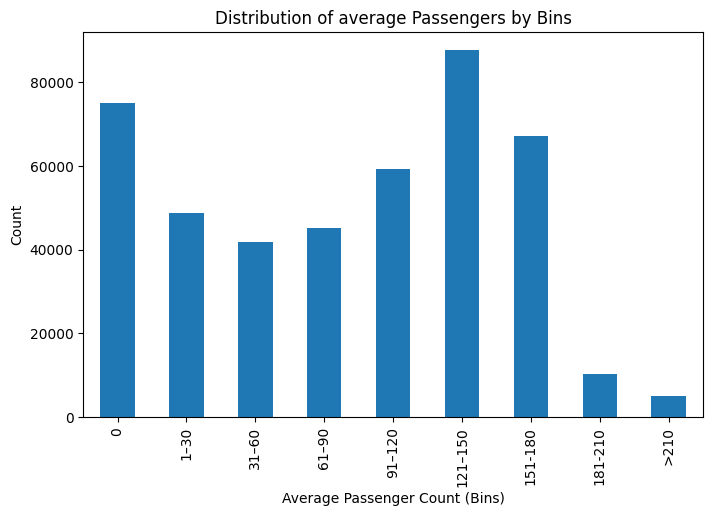

In [35]:
# Define bins and labels
bins = [-1, 0, 30, 60, 90, 120, 150, 180, 210, data["avg_passengers_per_flight"].max()]
labels = ["0", "1–30", "31–60", "61–90", "91–120", "121–150", "151-180", "181-210", ">210"]

# Assign average passengers to bins
data["avg_passengers_binned"] = pd.cut(data["avg_passengers_per_flight"], bins=bins, labels=labels)

# Count passengers in each bin
counts = data["avg_passengers_binned"].value_counts().sort_index()

# Visualize the distribution
counts.plot(kind="bar", figsize=(8,5))
plt.xlabel("Average Passenger Count (Bins)")
plt.ylabel("Count")
plt.title("Distribution of average Passengers by Bins")
plt.show()

In [36]:
data["route"] = data["origin"] + "-" + data["dest"]

In [37]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,MDW,"Chicago, IL",622,1,2024,10,<NA>,<NA>,NaN,ORD-MDW
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,1,<NA>,<NA>,NaN,BID-WST
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,7,<NA>,<NA>,NaN,BID-WST
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,8,<NA>,<NA>,NaN,BID-WST
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,WST,"Westerly, RI",79,1,2024,12,<NA>,<NA>,NaN,BID-WST


In [38]:
data["route"].value_counts()[:10]

route
LAX-LAS    391
LAS-LAX    390
LAX-SFO    385
SFO-LAX    348
ANC-ORD    345
IAH-DFW    315
DFW-IAH    304
DEN-SLC    302
SLC-DEN    296
MSP-ORD    295
Name: count, dtype: int64

In [39]:
same_route_count = (data["origin"] == data["dest"]).sum()
print(same_route_count)

4148


In [40]:
data[data["origin"] == data["dest"]][:10]

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,38.0,...,FAI,"Fairbanks, AK",416,2,2024,7,0,0,0,FAI-FAI
165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,174.0,...,AFW,"Dallas/Fort Worth, TX",626,1,2024,3,0,0,0,AFW-AFW
363,0.0,1.0,600.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0,...,FAI,"Fairbanks, AK",34,1,2024,8,0,3,0,FAI-FAI
364,0.0,1.0,600.0,3.0,0.0,0.0,0.0,0.0,60.0,58.0,...,BTT,"Bettles, AK",34,1,2024,8,0,3,0,BTT-BTT
380,0.0,1.0,600.0,3.0,2.0,0.0,0.0,0.0,72.0,68.0,...,OME,"Nome, AK",360,1,2024,2,2,3,1–30,OME-OME
388,0.0,1.0,750.0,3.0,0.0,0.0,0.0,0.0,50.0,48.0,...,MLY,"Manley Hot Springs, AK",34,1,2024,6,0,3,0,MLY-MLY
449,0.0,1.0,750.0,3.0,1.0,0.0,0.0,0.0,30.0,28.0,...,FAI,"Fairbanks, AK",34,1,2024,3,1,3,1–30,FAI-FAI
450,0.0,1.0,750.0,3.0,1.0,0.0,0.0,0.0,85.0,83.0,...,FAI,"Fairbanks, AK",34,1,2024,10,1,3,1–30,FAI-FAI
476,0.0,1.0,750.0,3.0,2.0,0.0,0.0,0.0,40.0,38.0,...,FAI,"Fairbanks, AK",34,1,2024,4,2,3,1–30,FAI-FAI
543,0.0,1.0,750.0,4.0,2.0,0.0,0.0,0.0,30.0,24.0,...,JNU,"Juneau, AK",35,4,2024,3,2,4,1–30,JNU-JNU


In [41]:
percent_same = 100 * same_route_count / len(data)
print(f"{same_route_count} rows ({percent_same:.2f} %) have origin = destination")

4148 rows (0.94 %) have origin = destination


In [42]:
#Remove rows where ORIGIN equals DESTINATION
#data = data[data["ORIGIN"] != data["DESTINATION"]]
#oder: data_clean = data[data["ORIGIN"] != data["DESTINATION"]].copy()


In [43]:
count_departures_0 = (data["departures_performed"] == 0).sum()
print("Rows with departures_performed = 0:", count_departures_0)

Rows with departures_performed = 0: 860


In [44]:
count_passengers_0 = (data["passengers"] == 0).sum()
print("Rows with passengers = 0:", count_passengers_0)


Rows with passengers = 0: 73832


In [45]:
#Remove rows where DEPARTURES_PERFORMED or PASSENGERS equal 0
#data = data[(data["DEPARTURES_PERFORMED"] != 0) & (data["PASSENGERS"] != 0)]
#oder: data_clean = data[(data["DEPARTURES_PERFORMED"] != 0) & (data["PASSENGERS"] != 0)].copy()

In [46]:
# Count the number of occurrences of each aircraft type
# For mapping to aircraft type name see file 'aircraft_type_mapping.csv'
# e.g. 614 = B737-800, 694 = A320-100/200, 673 = ERJ-175...
data["aircraft_type"].value_counts()[:10]

aircraft_type
614    50779
694    37766
673    30198
838    29329
612    25002
698    21360
699    19300
888    15138
721    14666
416    14095
Name: count, dtype: int64

In [47]:
mapping = pd.read_csv("../data/aircraft_type_mapping.csv")
data["aircraft_type"] = data["aircraft_type"].astype(str).str.strip()
mapping["Code"] = mapping["Code"].astype(str).str.strip()

In [48]:
# Merge
data = data.merge(
    mapping,
    left_on="aircraft_type",
    right_on="Code",
    how="left"
)

# New column 'aircraft_name' 
data["aircraft_name"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [49]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,"Chicago, IL",622,1,2024,10,<NA>,<NA>,NaN,ORD-MDW,Boeing 757-200
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,1,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,7,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,8,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",79,1,2024,12,<NA>,<NA>,NaN,BID-WST,Piper PA-32 (Cherokee 6)


In [50]:
# Sum departures_performed for each aircraft_name and get the top 15
aircraft_departures = (
    data.groupby("aircraft_name")["departures_performed"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)


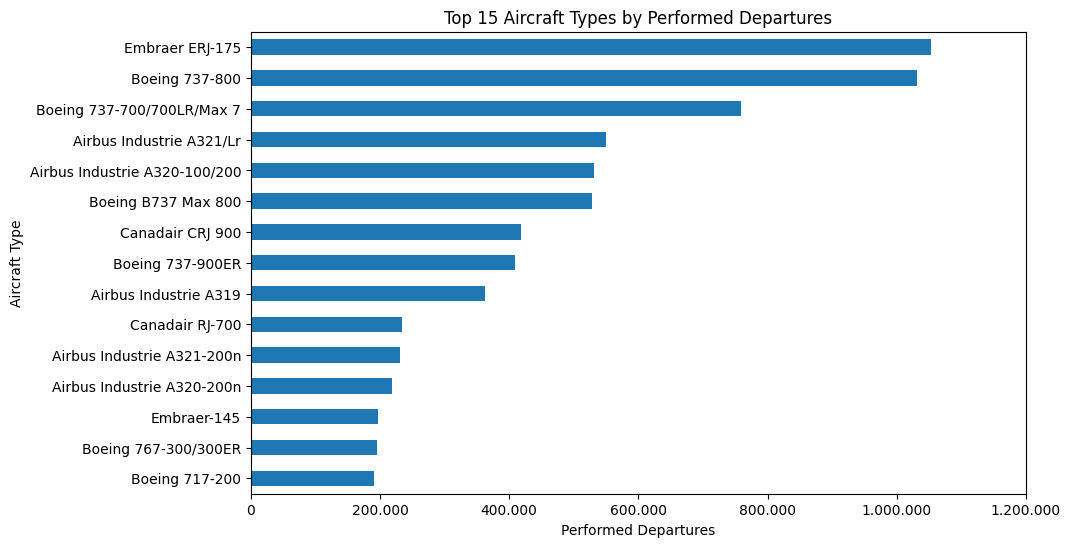

In [51]:
ax = aircraft_departures.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Performed Departures")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Performed Departures")
plt.gca().invert_yaxis()
plt.show()



In [52]:
aircraft_passengers = (
    data.groupby("aircraft_name")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)

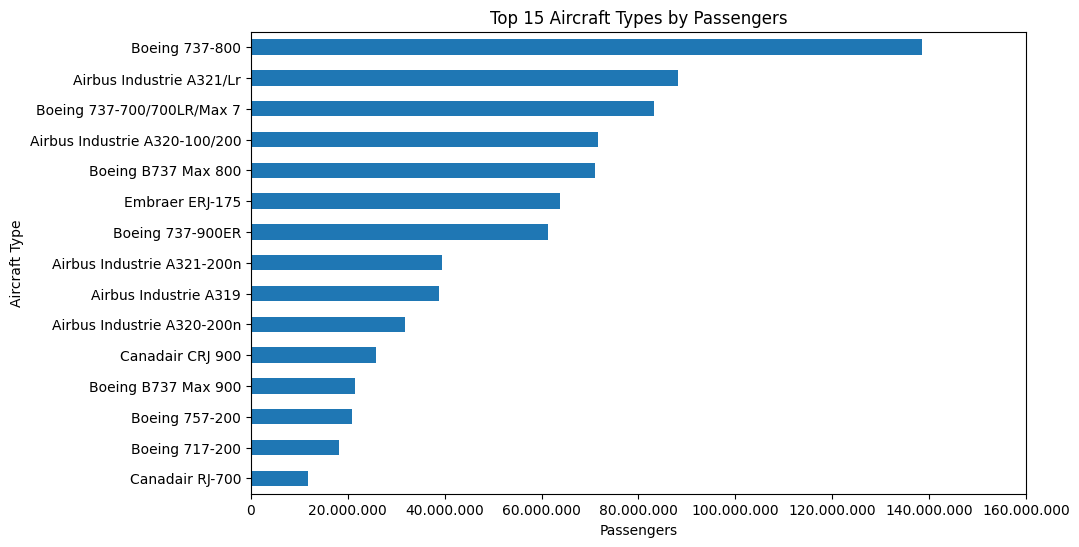

In [53]:
ax = aircraft_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])

plt.xlabel("Passengers")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Passengers")
plt.gca().invert_yaxis()
plt.show()

In [54]:
route_passengers = (
    data.groupby("route")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]   
)

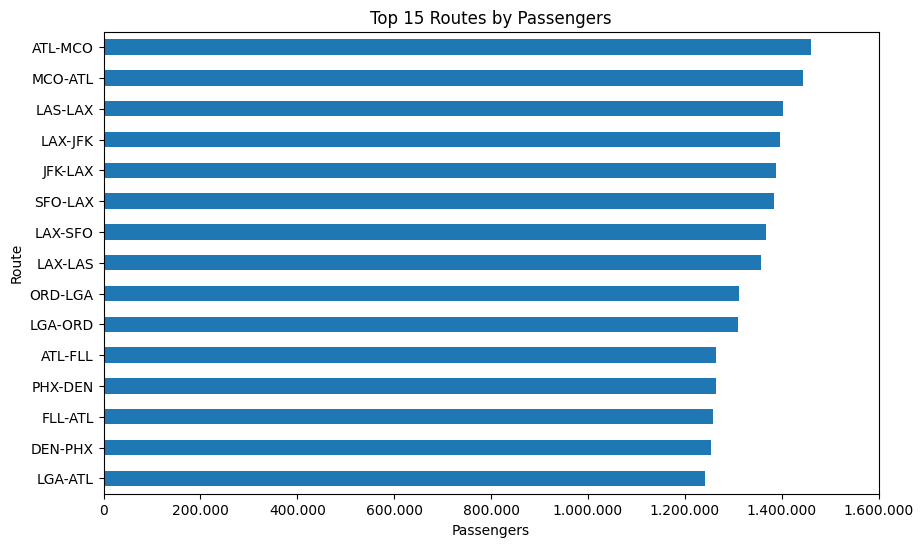

In [55]:
ax = route_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Passengers")
plt.ylabel("Route")
plt.title("Top 15 Routes by Passengers")
plt.gca().invert_yaxis()
plt.show()

In [56]:
route_avg_pax = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
    .iloc[:15]                    
)

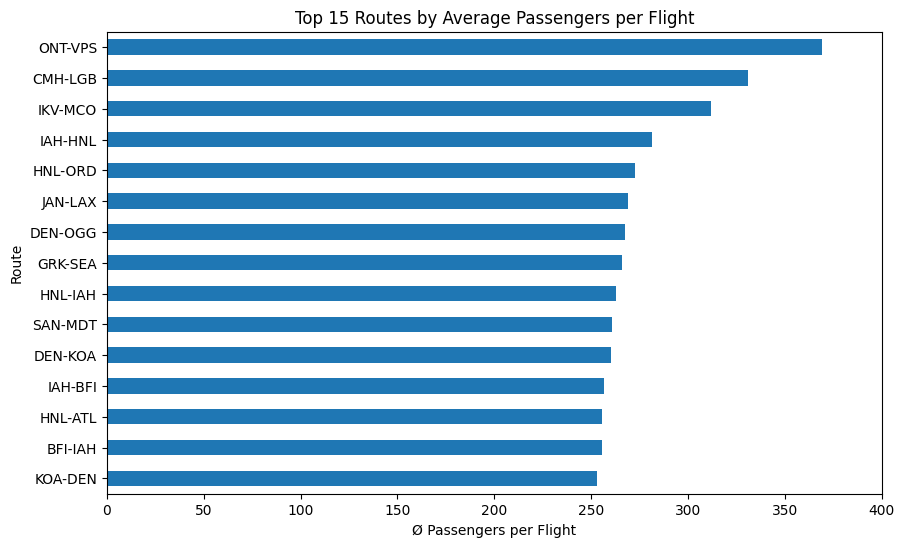

In [57]:
ax = route_avg_pax.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x") 
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:,.0f}".replace(",", ".") for x in xticks])
plt.xlabel("Ø Passengers per Flight")
plt.ylabel("Route")
plt.title("Top 15 Routes by Average Passengers per Flight")
plt.gca().invert_yaxis()
plt.show()

<Figure size 1200x600 with 0 Axes>

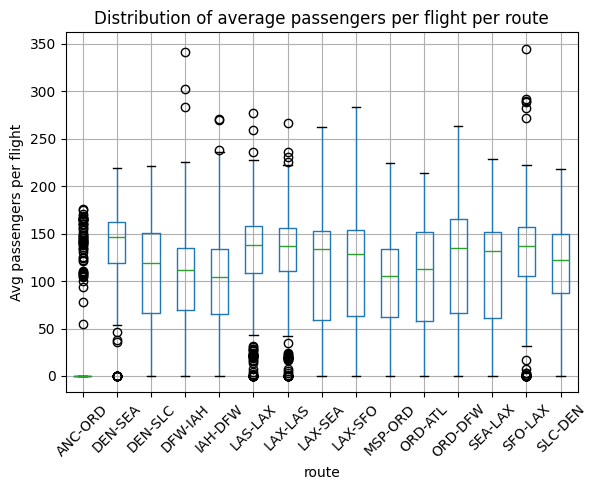

In [ ]:
# Route count
top15_routes = data["route"].value_counts().head(15).index
subset = data[data["route"].isin(top15_routes)]

plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight per route")
plt.suptitle("")
plt.show()

<Figure size 1200x600 with 0 Axes>

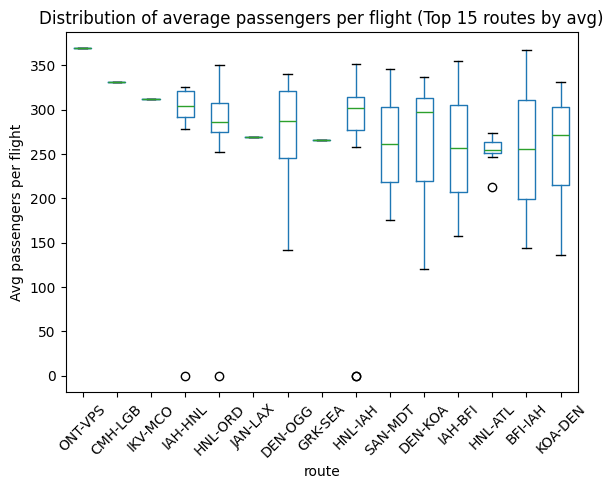

In [63]:
# Avg. passenger count
route_avg = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
)
top15_routes = route_avg.head(15).index
subset = data[data["route"].isin(top15_routes)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes), ordered=True)
plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45, grid=False)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight (Top 15 routes by avg)")
plt.suptitle("")
plt.show()



In [65]:
# Add pax_load_factor
data["pax_load_factor"] = (
    (data["passengers"] / data["seats"].replace(0, np.nan))
    .round(2)
)

In [68]:
data.tail(10)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,aircraft_name,pax_load_factor
440741,777.0,777.0,932400.0,4135.0,2545.0,11093.0,0.0,11.0,10302.0,7971.0,...,79,1,2024,6,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.62
440742,801.0,801.0,961200.0,4254.0,2599.0,16924.0,0.0,11.0,10938.0,8535.0,...,79,1,2024,5,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.61
440743,889.0,886.0,2360400.0,7992.0,5182.0,10195.0,0.0,59.0,33406.0,24906.0,...,416,1,2024,6,6,9,1–30,ANC-ENA,Cessna 208 Caravan,0.65
440744,891.0,889.0,2367000.0,8002.0,4689.0,5250.0,0.0,59.0,33895.0,26497.0,...,416,1,2024,6,5,9,1–30,ENA-ANC,Cessna 208 Caravan,0.59
440745,987.0,986.0,2900400.0,8874.0,7626.0,6509.0,0.0,59.0,38376.0,29634.0,...,416,1,2024,8,8,9,1–30,ENA-ANC,Cessna 208 Caravan,0.86
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,416,1,2024,8,6,9,1–30,ANC-ENA,Cessna 208 Caravan,0.63
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,416,1,2024,7,7,9,1–30,ANC-ENA,Cessna 208 Caravan,0.81
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,416,1,2024,7,7,9,1–30,ENA-ANC,Cessna 208 Caravan,0.74
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,79,1,2024,7,3,5,1–30,TIQ-SPN,Piper PA-32 (Cherokee 6),0.63
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,79,1,2024,7,3,5,1–30,SPN-TIQ,Piper PA-32 (Cherokee 6),0.62


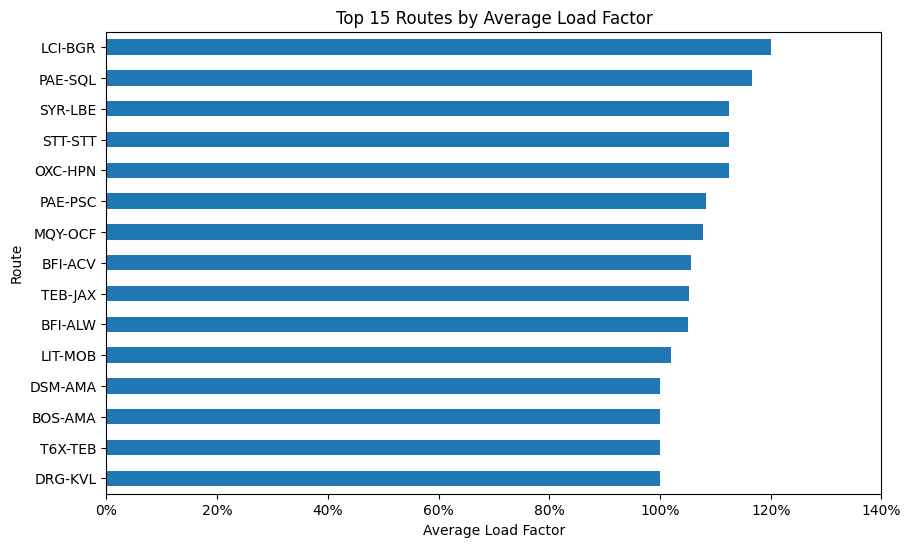

In [73]:
route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .sort_values("pax_load_factor", ascending=False)
    .head(15)
)
ax = route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Top 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.0%}" for x in xticks])

plt.show()

<Figure size 1200x600 with 0 Axes>

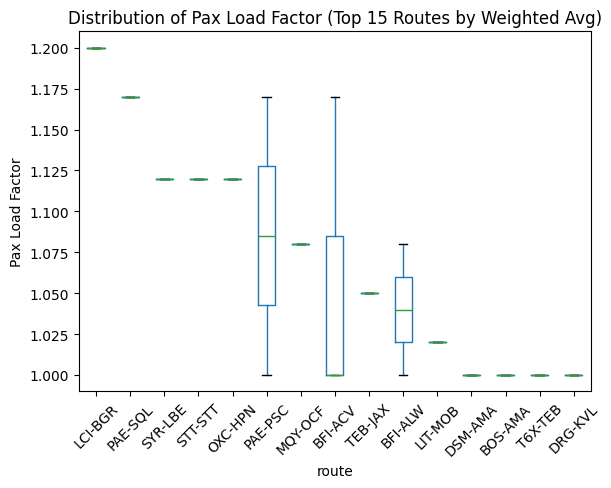

In [ ]:
# Pax Load Factor
top15_routes_load_factor = route_load_factor.head(15).index
subset = data[data["route"].isin(top15_routes_load_factor)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes_load_factor), ordered=True)

plt.figure(figsize=(12,6))
subset.boxplot(column="pax_load_factor", by="route", rot=45, grid=False)
plt.ylabel("Pax Load Factor")
plt.title("Distribution of Pax Load Factor (Top 15 Routes by Weighted Avg)")
plt.suptitle("")
plt.show()



In [74]:
# Cases with Load Factor > 1 
overs = data[data["pax_load_factor"] > 1]
print(overs[["route", "passengers", "seats", "pax_load_factor"]].head(20))

         route  passengers  seats  pax_load_factor
1137   LCI-BGR         6.0    5.0             1.20
1138   LCI-BGR         6.0    5.0             1.20
4243   VNY-PGA         8.0    7.0             1.14
4868   STX-STX         9.0    8.0             1.12
4869   SJC-VNY         9.0    8.0             1.12
7982   PAE-PSC         7.0    6.0             1.17
7983   BFI-SUO         7.0    6.0             1.17
7984   ACV-BFI         7.0    6.0             1.17
7985   BFI-ACV         7.0    6.0             1.17
7986   PAE-SQL         7.0    6.0             1.17
8372   ARC-VEE        10.0    9.0             1.11
15770  HPN-TEB         9.0    8.0             1.12
15771  MVY-ACK         9.0    8.0             1.12
15772  OXC-HPN         9.0    8.0             1.12
15773  BED-ACK         9.0    8.0             1.12
15774  ACK-BED         9.0    8.0             1.12
15775  BDR-ACK         9.0    8.0             1.12
15776  ACK-BDR         9.0    8.0             1.12
15777  MVY-LGA         9.0    8

In [75]:
count_over = (data["pax_load_factor"] > 1.0).sum()
percent_over = 100 * count_over / len(data)

print(f"Count: {count_over}")
print(f"Share: {percent_over:.2f}%")

Count: 62
Share: 0.01%


In [ ]:
# Remove rows where pax_load_factor > 1.0?

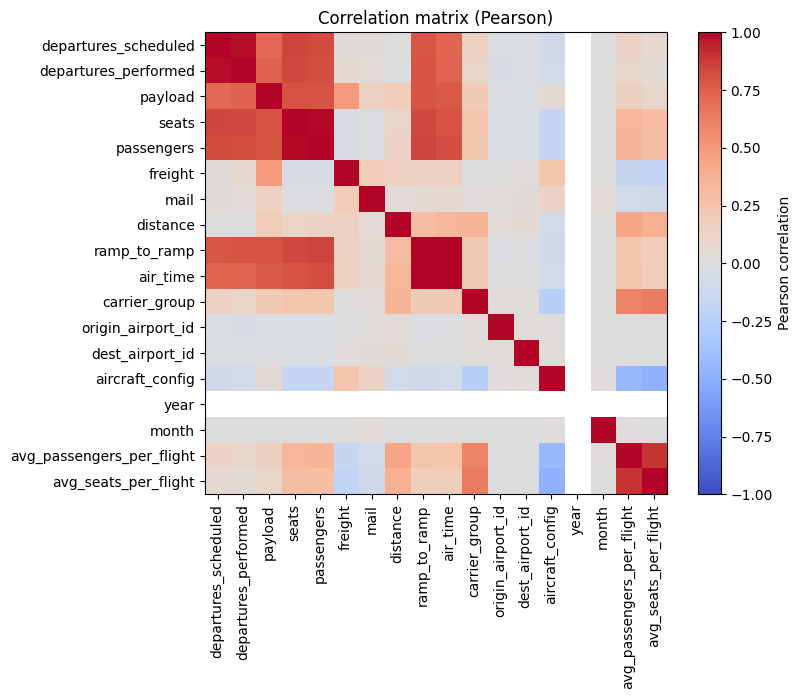

In [58]:
pearson = data.select_dtypes('number').corr(method='pearson')
plt.figure(figsize=(8,6))
plt.imshow(pearson, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson correlation")
plt.xticks(range(len(pearson.columns)), pearson.columns, rotation=90)
plt.yticks(range(len(pearson.index)), pearson.index)
plt.title("Correlation matrix (Pearson)")
plt.show()



In [59]:
# Top 10 Correlations
mask = ~np.eye(len(pearson), dtype=bool)
pearson_long = (
    pearson.where(mask)
           .stack()
           .reset_index()
)
pearson_long.columns = ["var1", "var2", "corr"]
top10 = (
    pearson_long
    .assign(abs_corr=lambda d: d["corr"].abs())
    .sort_values("abs_corr", ascending=False)
    .drop_duplicates(subset=["abs_corr"]) 
    .head(10)
)

print(top10)

                     var1                       var2      corr  abs_corr
136          ramp_to_ramp                   air_time  0.992969  0.992969
67             passengers                      seats  0.991495  0.991495
16   departures_performed       departures_scheduled  0.980213  0.980213
271  avg_seats_per_flight  avg_passengers_per_flight  0.895339  0.895339
132          ramp_to_ramp                 passengers  0.848725  0.848725
2    departures_scheduled                      seats  0.836495  0.836495
131          ramp_to_ramp                      seats  0.834387  0.834387
18   departures_performed                      seats  0.828825  0.828825
64             passengers       departures_scheduled  0.822970  0.822970
65             passengers       departures_performed  0.814817  0.814817
